In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score

In [2]:
#reading dataset
data=pd.read_csv('/home/crossml/Downloads/data_b.csv')
df=data.copy(deep=True)
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                       NaN  31.0        0  
2                       NaN  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1

In [3]:
data.shape

(768, 9)

In [4]:
#checking for missing values
data.isnull().sum()

Pregnancies                  6
Glucose                     17
BloodPressure               17
SkinThickness               15
Insulin                      3
BMI                         29
DiabetesPedigreeFunction    29
Age                          2
Outcome                      0
dtype: int64

In [5]:
#summary of the data
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   762.000000  751.000000     751.000000     753.000000  765.000000   
mean      3.824147  120.719041      69.102530      20.540505   79.905882   
std       3.360596   31.958175      19.282846      15.912954  115.431340   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   29.000000   
75%       6.000000  140.000000      80.000000      32.000000  128.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  739.000000                739.000000  766.000000  768.000000  
mean    32.032882                  0.471766   33.227154    0.348958  
std      7.901092                  0.326533   11.755153    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.350000                  0.245000   24.000000    0.000000  
50%     32.300000                  0.375000   29.000000    0.000000  
75%     36.600000                  0.621500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
#replacing 0 with NaN
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   762.000000  746.000000     717.000000     530.000000  392.000000   
mean      3.824147  121.528150      72.379358      29.183019  155.938776   
std       3.360596   30.491277      12.327968      10.357435  118.947844   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.750000   
50%       3.000000  117.000000      72.000000      29.000000  125.500000   
75%       6.000000  140.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  728.000000                739.000000  766.000000  768.000000  
mean    32.516896                  0.471766   33.227154    0.348958  
std      6.900113                  0.326533   11.755153    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.375000   29.000000    0.000000  
75%     36.650000                  0.621500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<AxesSubplot:>

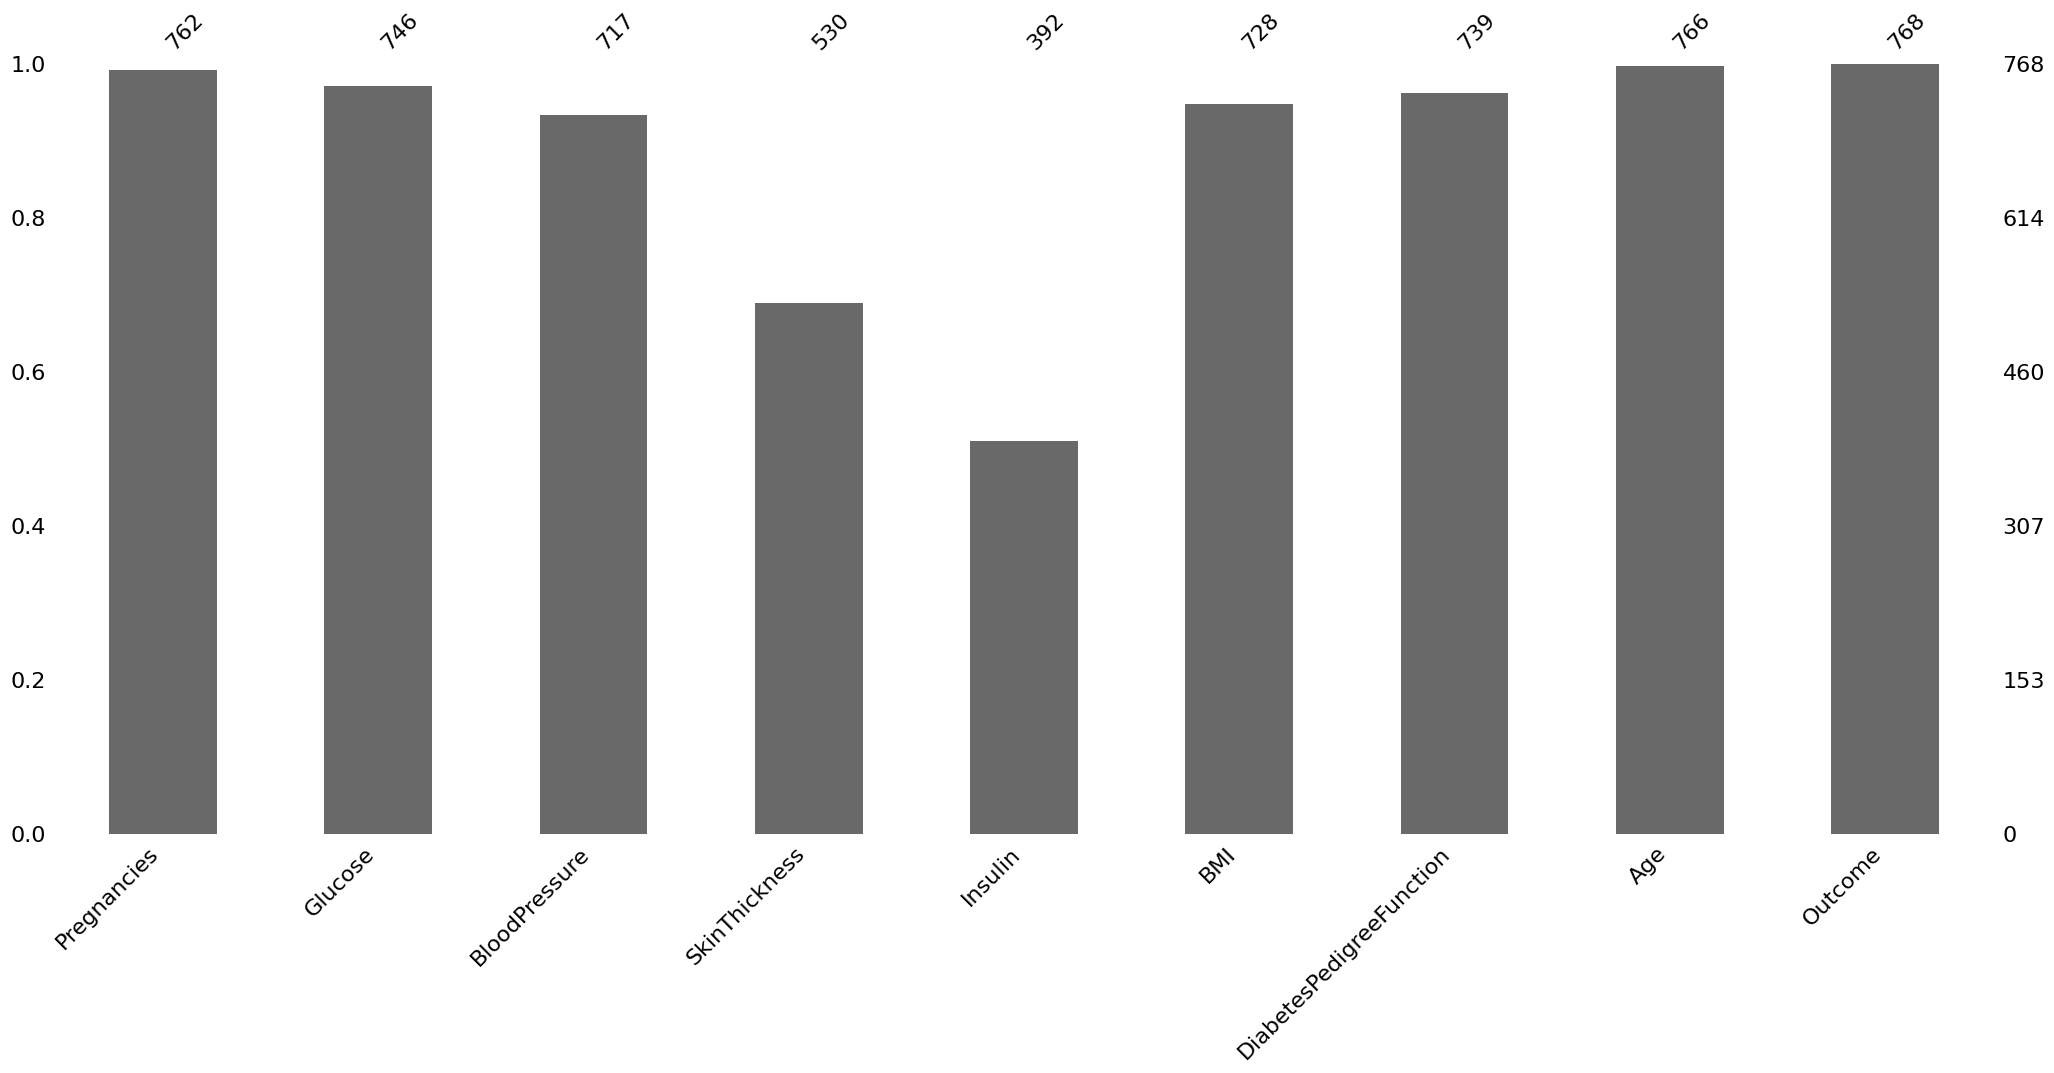

In [8]:
#plotting missing values
import missingno as msno
msno.bar(df)

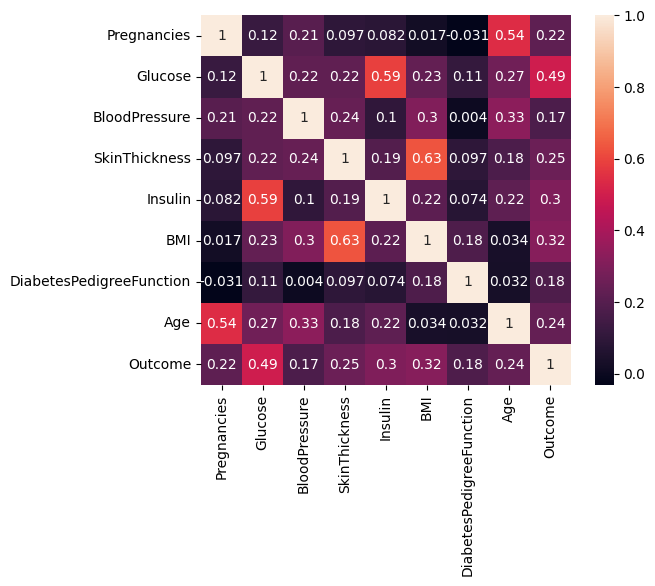

In [9]:
#correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, square=True)
#plt.yticks(rotation=0)
plt.show()

In [10]:
df.groupby('Outcome').mean() #grouping the data by outcome

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.289157  110.673469      70.823404      27.320113  130.679389   
1           4.833333  142.304688      75.340081      32.898305  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.923579                  0.428319  31.190000  
1        35.508300                  0.552286  37.056391

<AxesSubplot:>

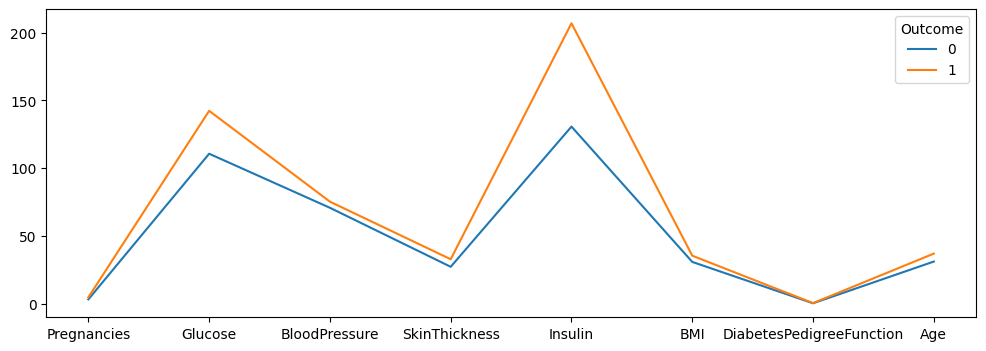

In [11]:
df.groupby('Outcome').mean().T.plot(figsize=(12,4))  #line plot

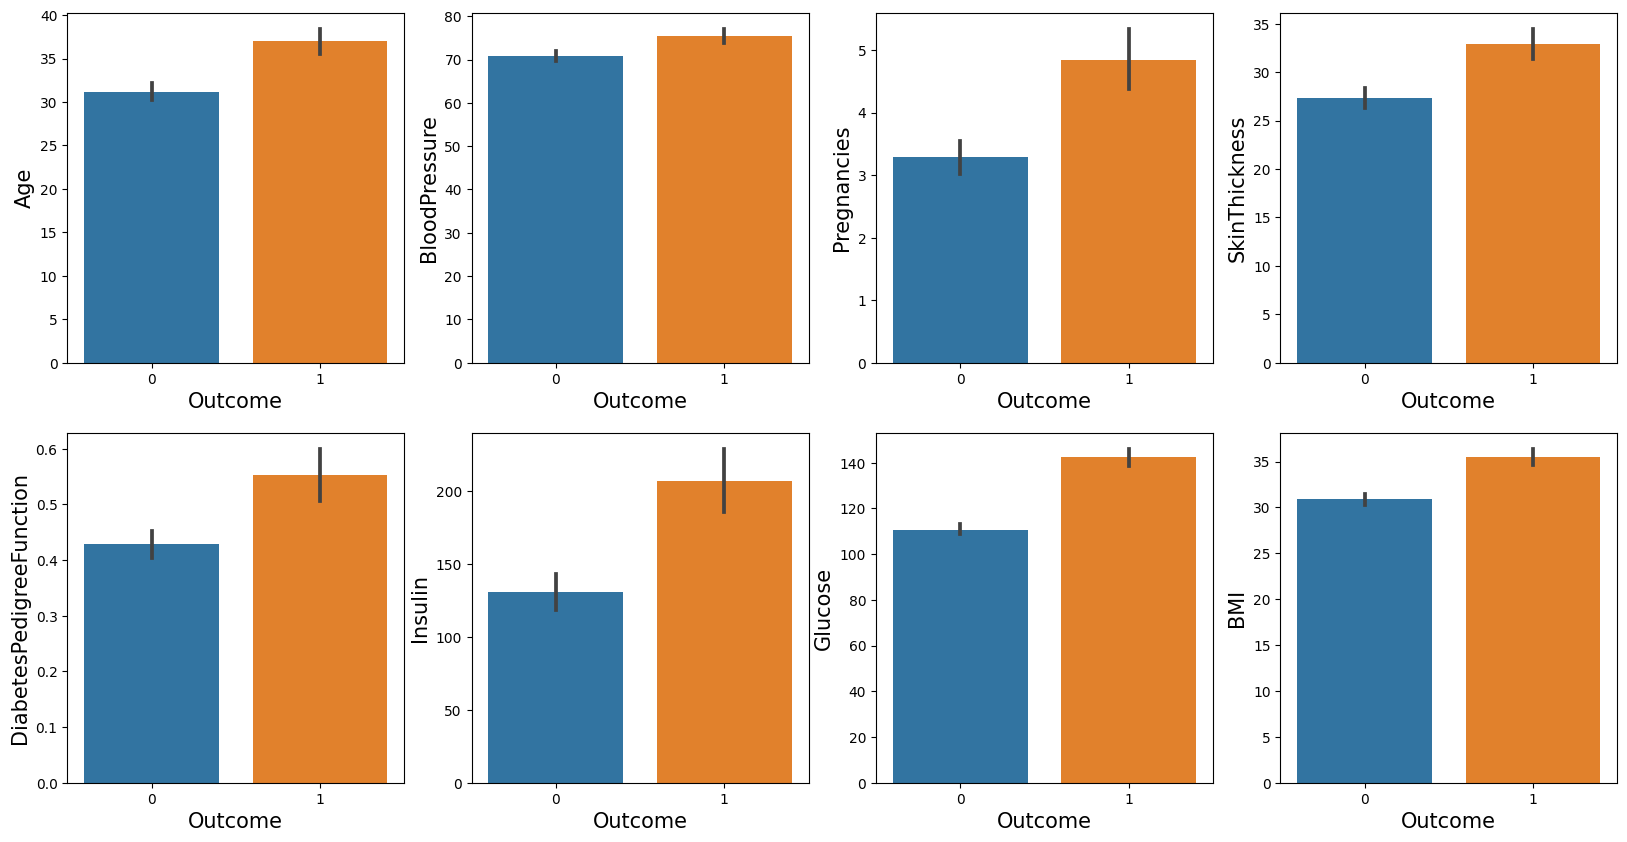

In [14]:
#bar plot for grouped data
plt.figure(figsize=(20,10))
for i,col in enumerate(set(df.columns)-{"Outcome"}):
 plt.subplot(2,4,i+1)
 sns.barplot(data=df,x="Outcome",y=col,)
 plt.xlabel("Outcome", fontsize=15)
 plt.xticks(fontsize=10)
 plt.ylabel(col,fontsize=15)
 plt.yticks(fontsize=10)

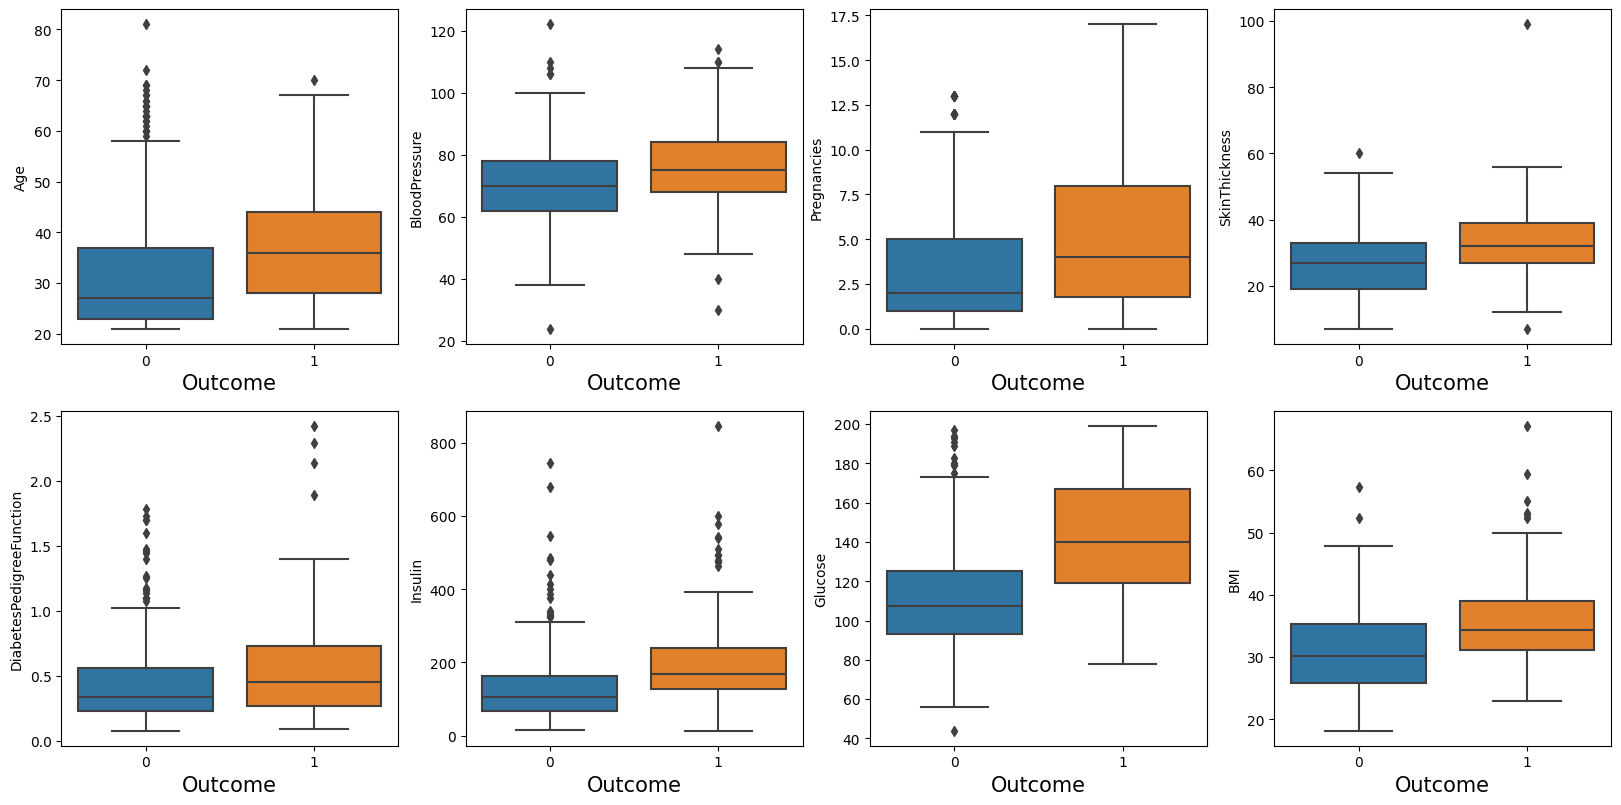

In [15]:
#box plot for grouped data

plt.figure(figsize=(20,20))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df,x='Outcome', y=col )
    plt.xlabel('Outcome', fontsize=15)
    plt.xticks(fontsize=10)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

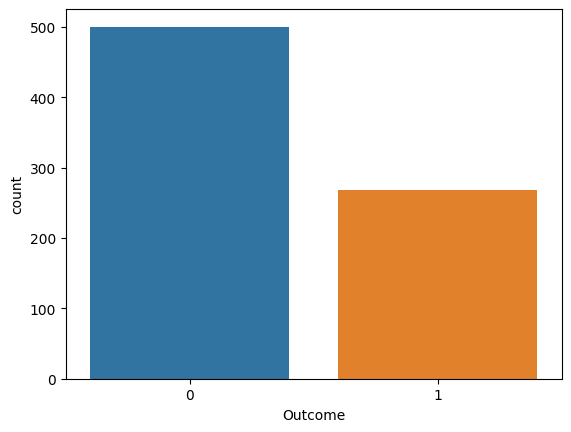

In [16]:
sns.countplot(x='Outcome',data=df) #count plot for outcome

/home/crossml/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/crossml/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/crossml/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

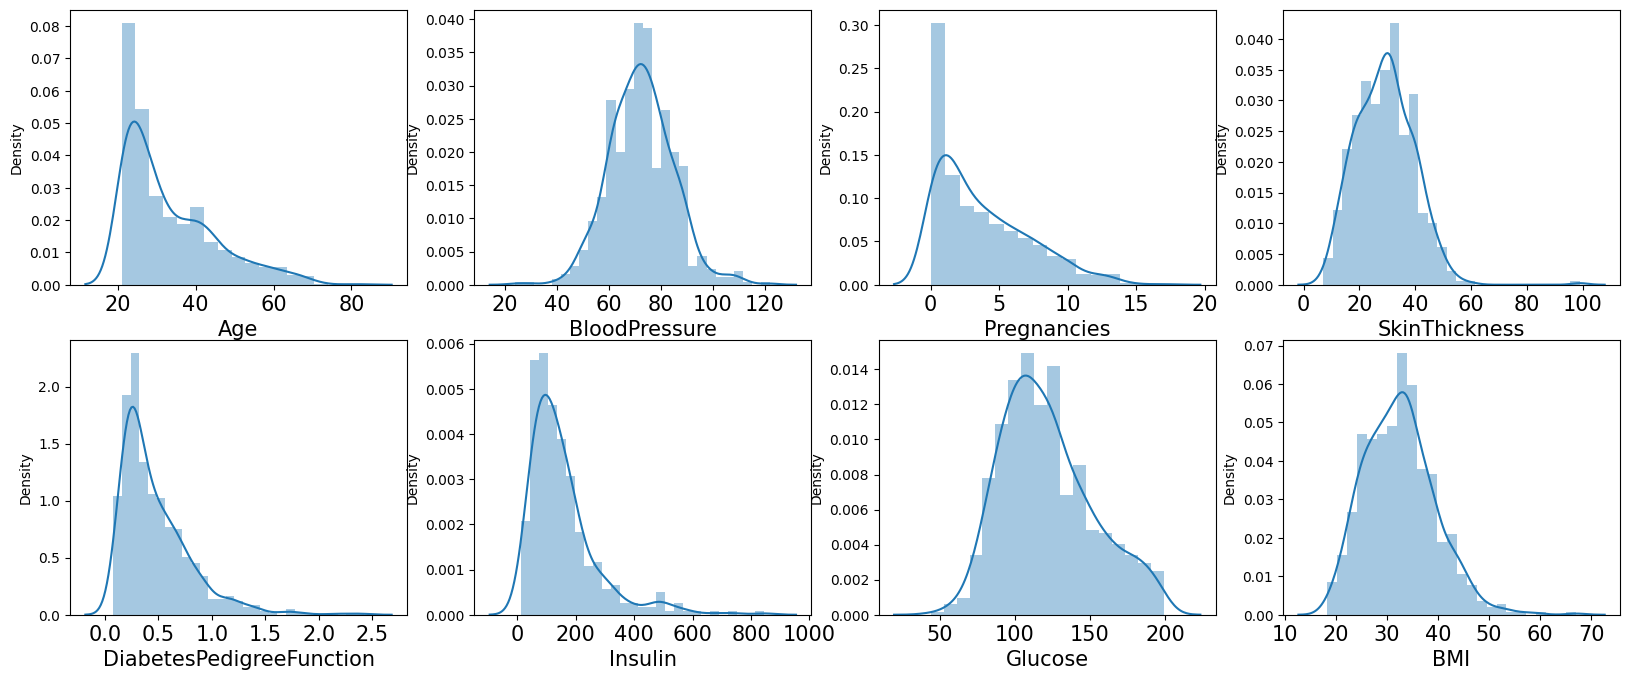

In [17]:
#distribution plots for each variable
plt.figure(figsize=(20,25))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
 plt.subplot(6,4,i+1)
 sns.distplot(df[col])
 plt.xlabel(col, fontsize=15)
 plt.xticks(fontsize=15)

In [ ]:
#replacing missing values 

In [19]:
df1=df.copy(deep=True)
for column in df1[['BloodPressure', 'BMI']]:
 df1[column]=df1[column].fillna(df1[column].mean())
for column in df1[['Pregnancies','Glucose','DiabetesPedigreeFunction','Age']]:
 df1[column]=df1[column].fillna(df1[column].mean())

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean',)
imputed_data = imputer.fit_transform(df1) 
df2 = pd.DataFrame(imputed_data)
df2.columns = df1.columns

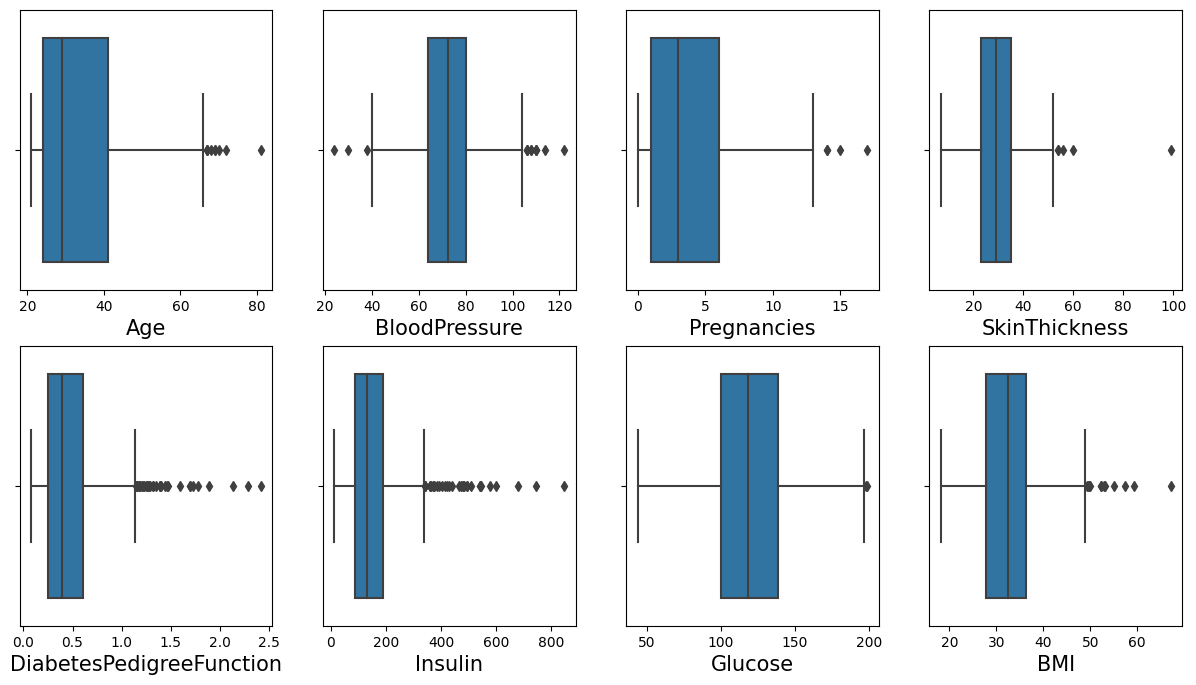

In [21]:
plt.figure(figsize=(15,8))
for i,col in enumerate(set(df2.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.boxplot(data=df2,x=col)
 plt.xlabel(col, fontsize=15)
 plt.xticks(fontsize=10)

In [22]:
#handling the outliers
def detect_outliers(df2):
    outliers= pd.DataFrame(columns=["Feature","No.of Outliers","Handled?"])
    for col in list(set(df2.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df2[col].quantile(0.25)
        q3 = df2[col].quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5*iqr)
        high = q3 + (1.5*iqr)
        n = df2.loc[(df2[col] < low) | (df2[col] > high)].shape[0]
                   
        df2.loc[(df2[col] < low),col] = low
        df2.loc[(df2[col] > high),col] = high
 #let's fix them
#df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
    return outliers
detect_outliers(df2)

/tmp/ipykernel_4641/2890332269.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
/tmp/ipykernel_4641/2890332269.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
/tmp/ipykernel_4641/2890332269.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append({'Feature': col, "No.of Outliers": n ,"Handled?": df2[col].all() < high},ignore_index=True)
/tmp/ipykernel_4641/2890332269.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

Feature No.of Outliers Handled?
0                       Age              9     True
1             BloodPressure             13     True
2               Pregnancies              4     True
3             SkinThickness              5     True
4  DiabetesPedigreeFunction             35     True
5                   Insulin             33     True
6                   Glucose              2     True
7                       BMI             12     True

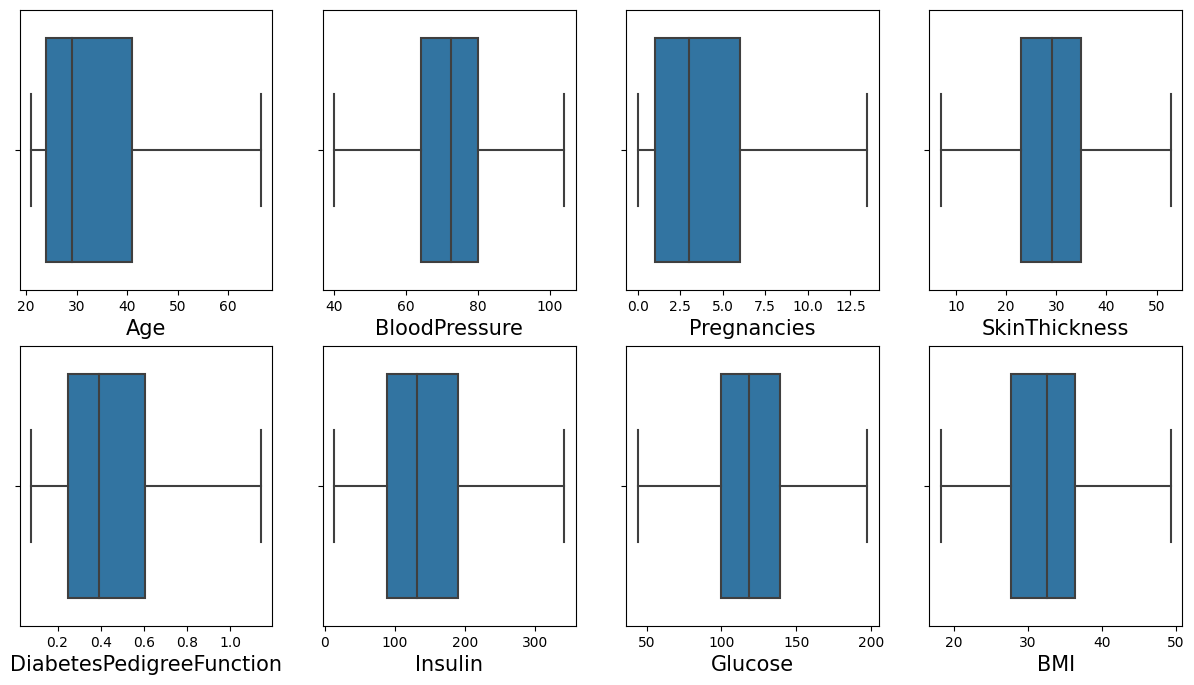

In [23]:
plt.figure(figsize=(15,8))
for i,col in enumerate(set(df2.columns)-{'Outcome'}):
 plt.subplot(2,4,i+1)
 sns.boxplot(data=df2,x=col)
 plt.xlabel(col, fontsize=15)
 plt.xticks(fontsize=10)

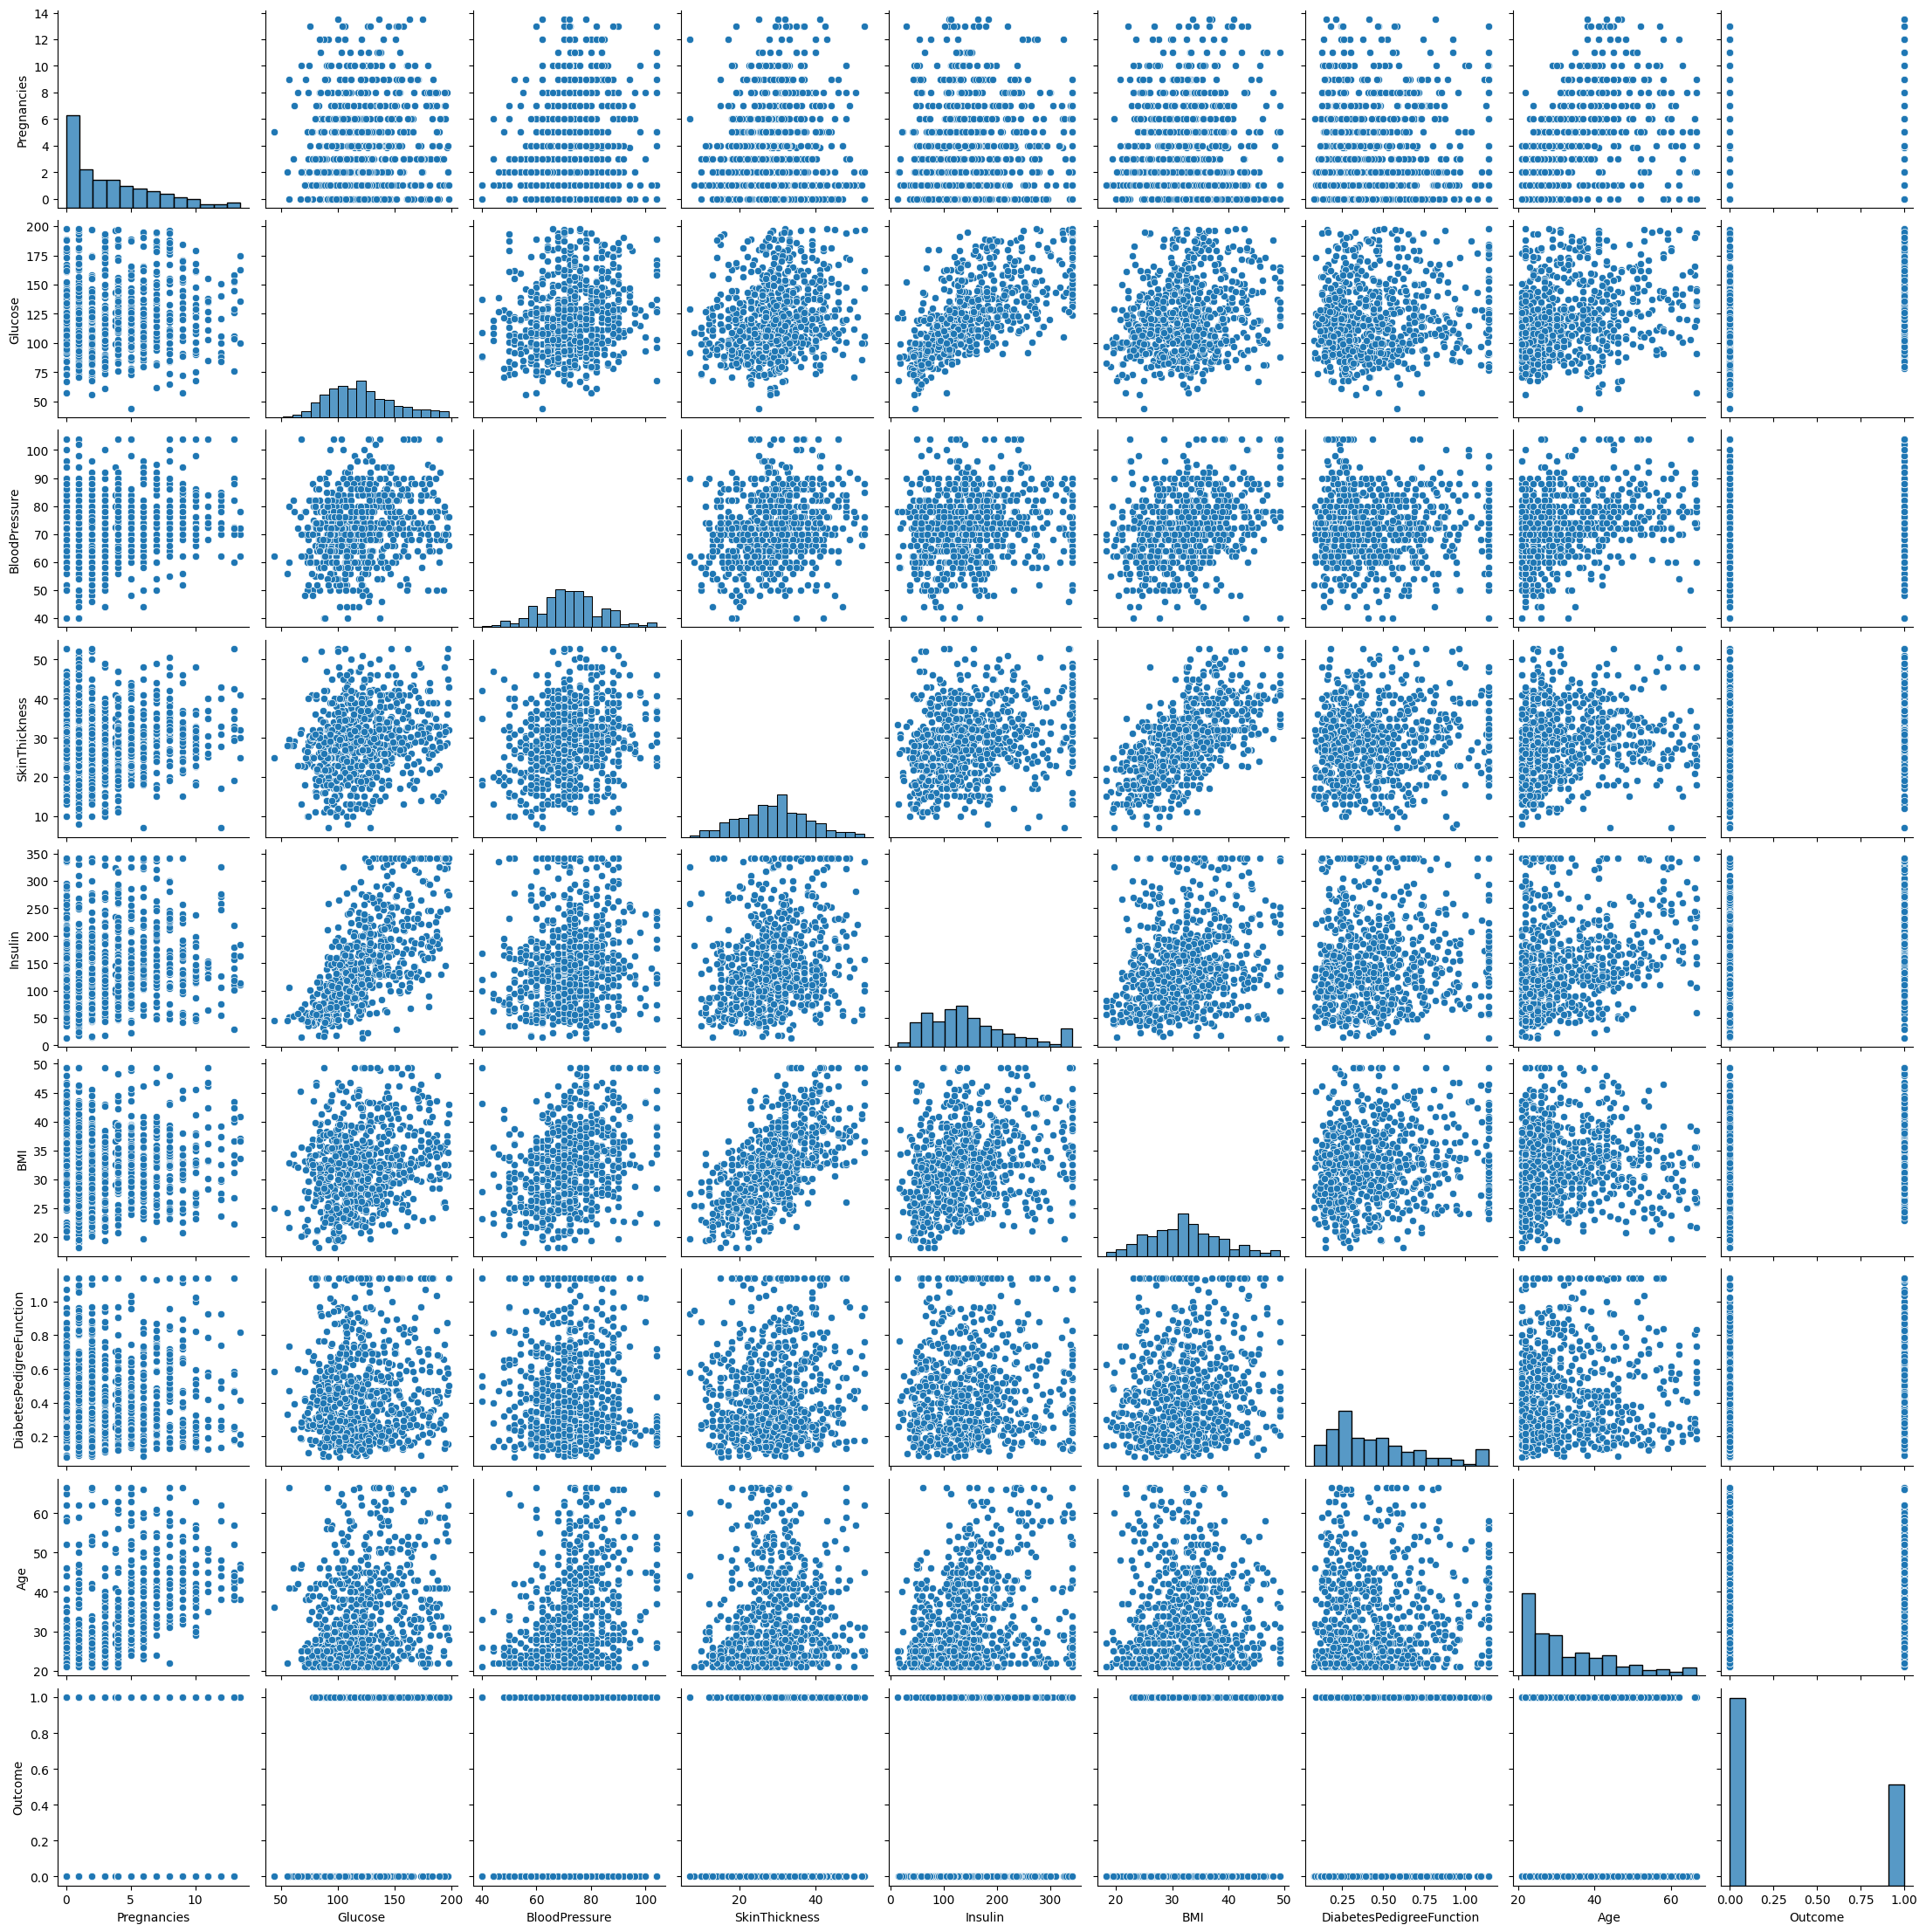

In [24]:
sns.pairplot(data=df2,kind='scatter')  #pairplot for the data

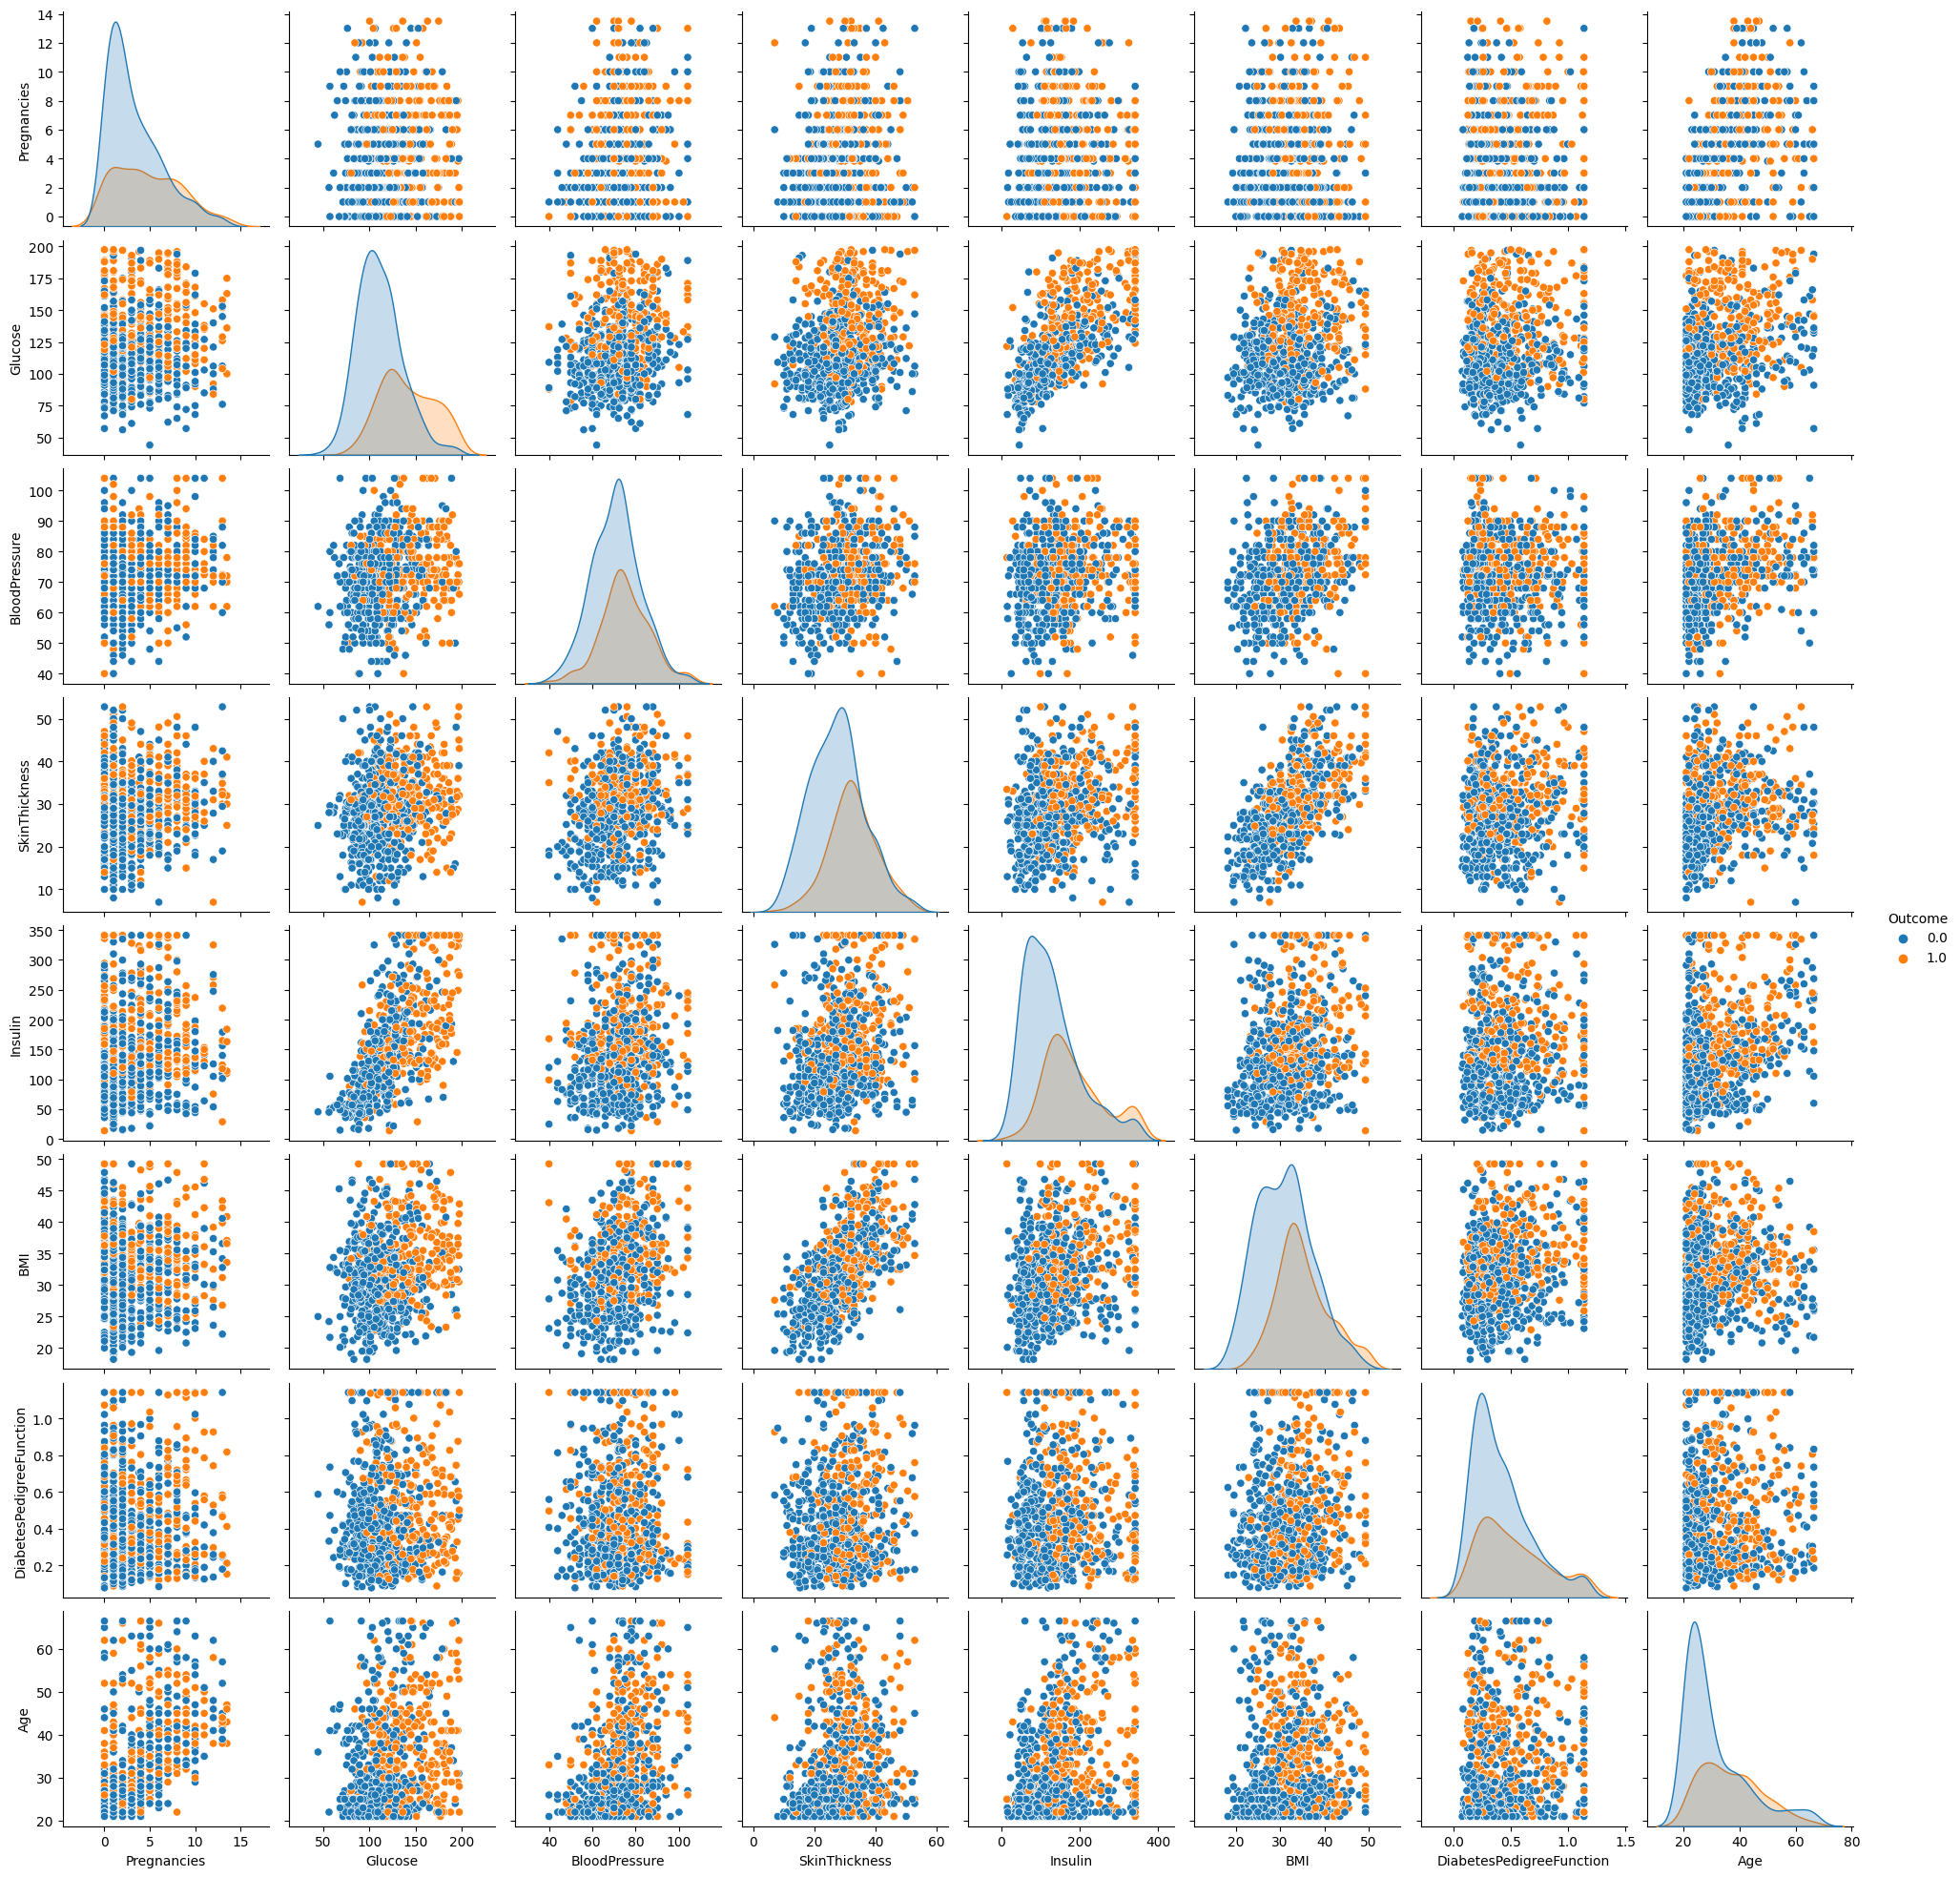

In [25]:
sns.pairplot(data=df2,hue='Outcome')  #pairplot for the data with respect to outcome

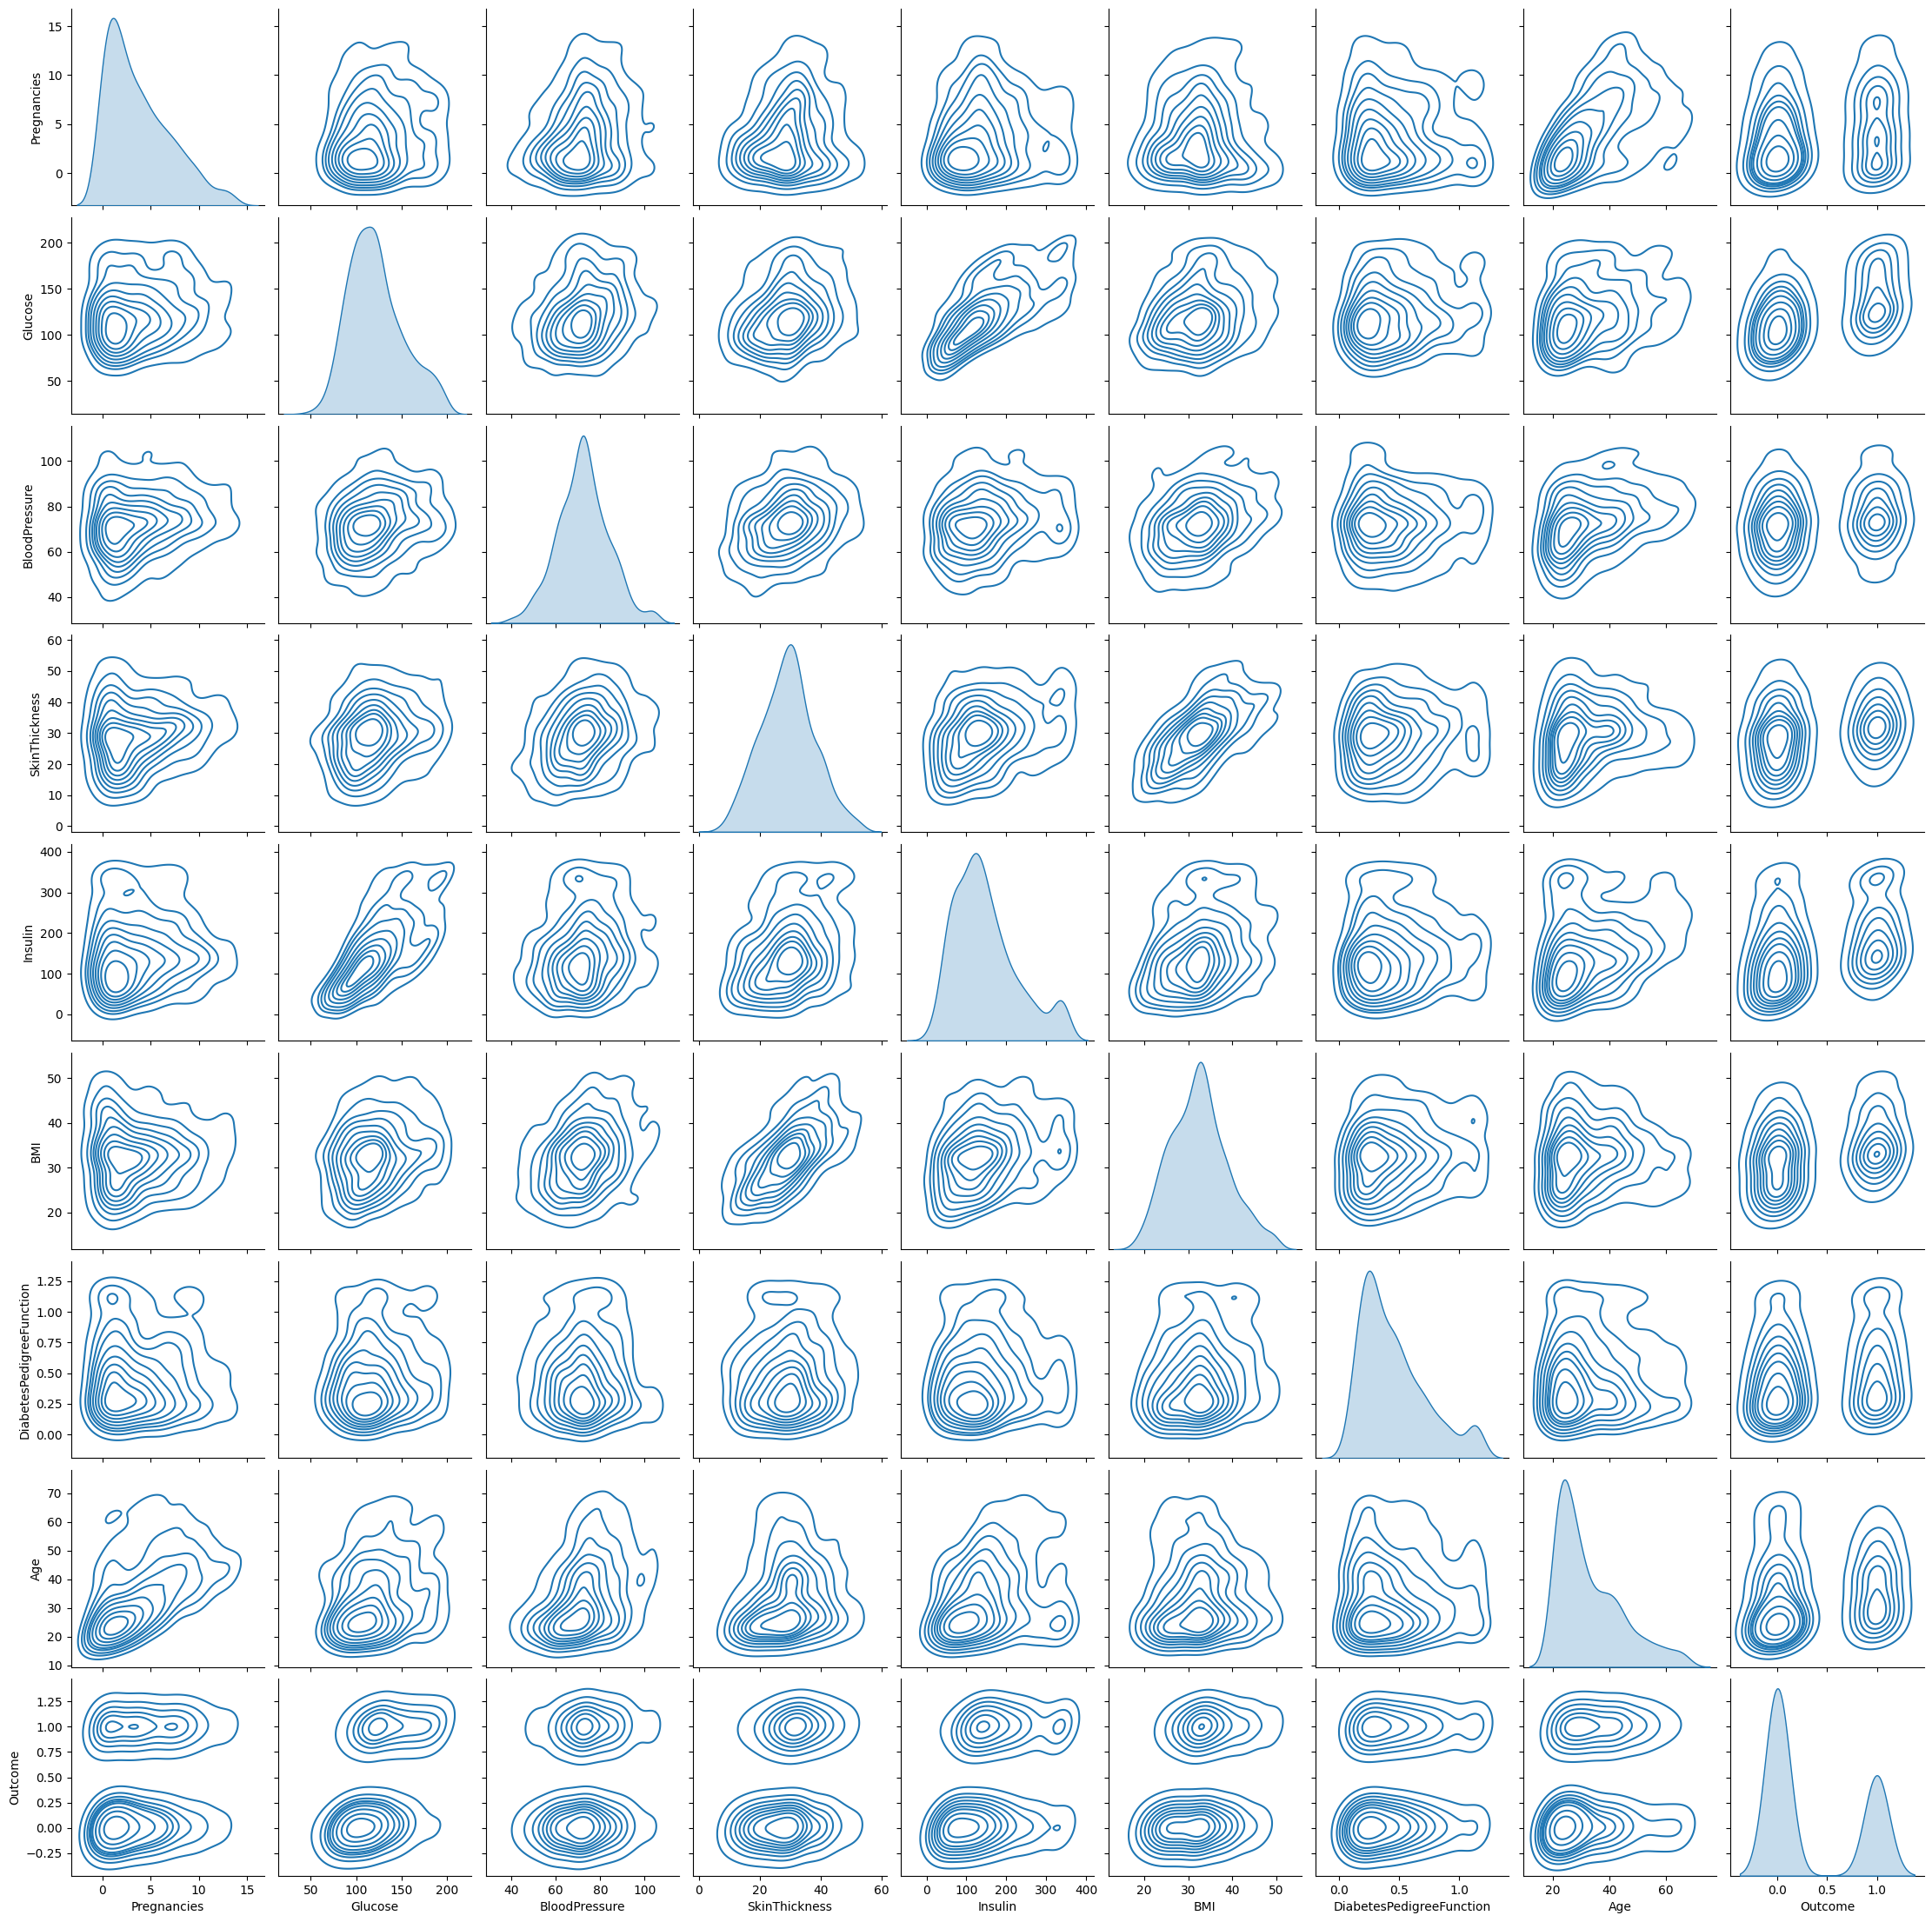

In [26]:
sns.pairplot(data=df2,kind='kde')  #kernel density plot for the data

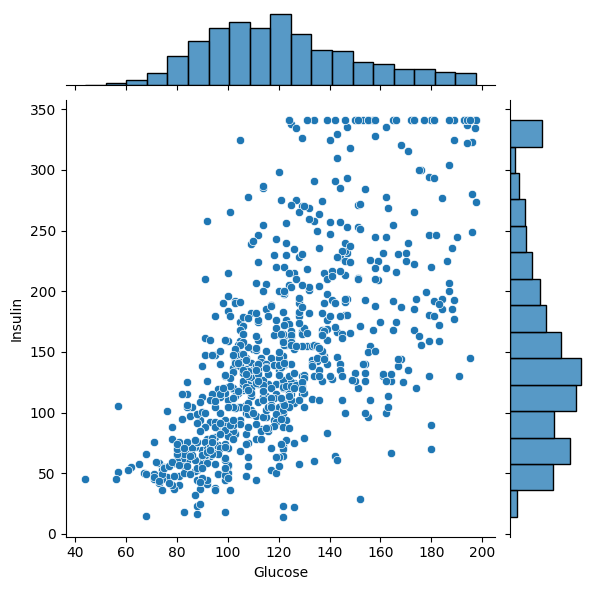

In [27]:
sns.jointplot(x='Glucose', y='Insulin', data=df2) #jointplot

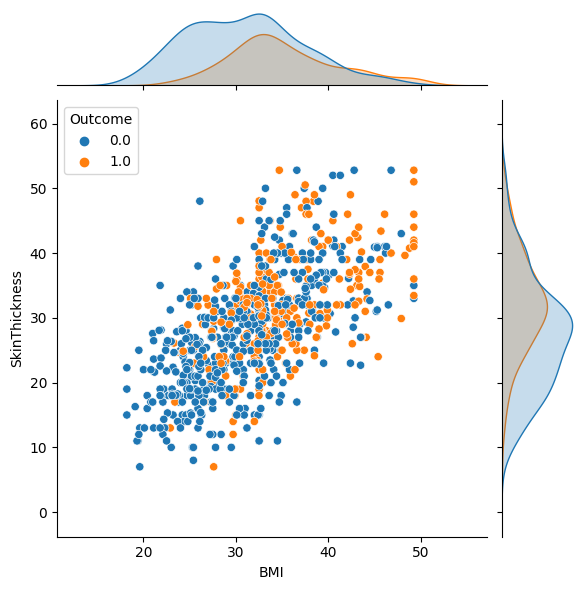

In [28]:
sns.jointplot(x='BMI', y='SkinThickness', data=df2,hue='Outcome')